
**CS-5530 Principles of Data Science - Take Home Final**  
**Farzana Sultana Rafi**  
**frn66@umkc.edu**

# Part 0: Seed + Assigned Settings (printed dict)

In [3]:
import hashlib, numpy as np, random
STUDENT_ID_STR = "frn66@umkc.edu"
# Personal seed derived from hash (stable, unique)
seed = int(hashlib.sha256(STUDENT_ID_STR.encode()).hexdigest(), 16) % (10**9)
rng = np.random.default_rng(seed)
random.seed(seed)
np.random.seed(seed)

# Assigned parameters (unique to each student)
dataset_pick = rng.integers(0, 3) # 0/1/2 choose dataset
cv_folds = int(rng.choice([4,5,6,7,8])) # K for K-fold CV
bootstrap_B = int(rng.choice([400, 600, 800])) # bootstrap replicates
outlier_method = rng.choice(["IQR", "zscore"]) # handling strategy
knn_k = int(rng.choice([3,5,7,9])) # K for KNN
tree_depth = int(rng.choice([3,4,5,6,7])) # max depth for trees
sim_bias_p = float(rng.choice([0.35, 0.45, 0.55, 0.65])) # for simulation
viz_trick = rng.choice(["truncated_y", "unequal_bins", "dual_axis"]) # ethics plot variant
print({
"seed": seed, "dataset_pick": int(dataset_pick), "cv_folds": cv_folds,
"bootstrap_B": bootstrap_B, "outlier_method": outlier_method,
"knn_k": knn_k, "tree_depth": tree_depth, "sim_bias_p": sim_bias_p,
"viz_trick": viz_trick
})

{'seed': 718880294, 'dataset_pick': 2, 'cv_folds': 7, 'bootstrap_B': 400, 'outlier_method': np.str_('IQR'), 'knn_k': 3, 'tree_depth': 7, 'sim_bias_p': 0.35, 'viz_trick': np.str_('unequal_bins')}


# Part A: Ethics & Graphics

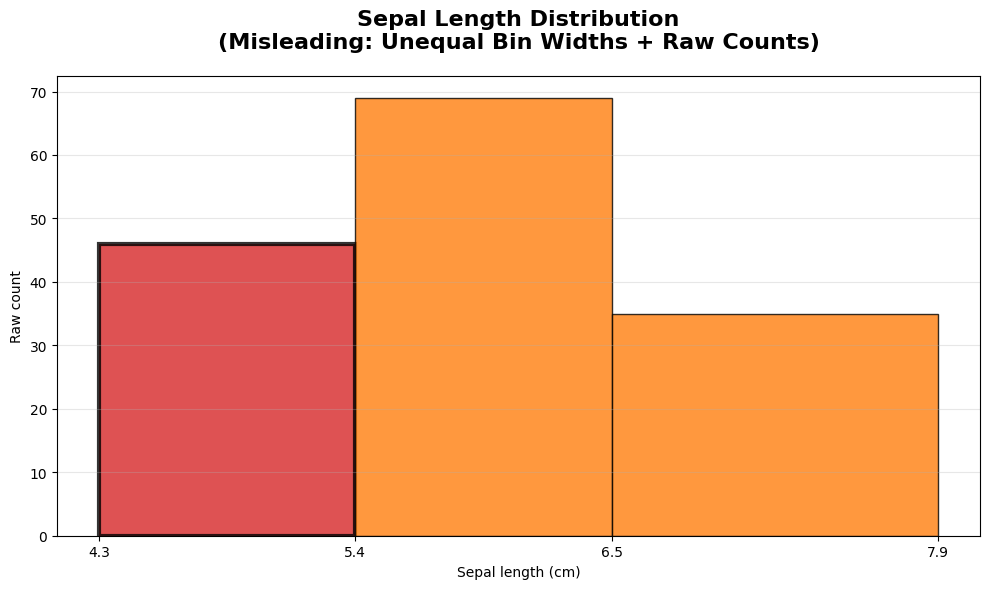

EXPLANATION (Question 2):


The histogram is misleading because it uses bins of dramatically unequal widths while displaying raw counts instead of density.
The first bin (4.3–5.4 cm) is only 1.1 cm wide but captures nearly all Setosa flowers, producing an enormous bar.
The second bin (5.4–6.5 cm) is 1.1 cm wide but appears tiny despite containing many non-Setosa flowers.
The final bin (6.5–7.9 cm) is 1.4 cm wide and looks moderate even though it covers a large range.
An uninformed reader would conclude that almost all irises have very short sepals and the distribution is extremely skewed to the left.
In reality, sepal length shows considerable overlap between Setosa and non-Setosa classes, which the unequal bins completely hide.



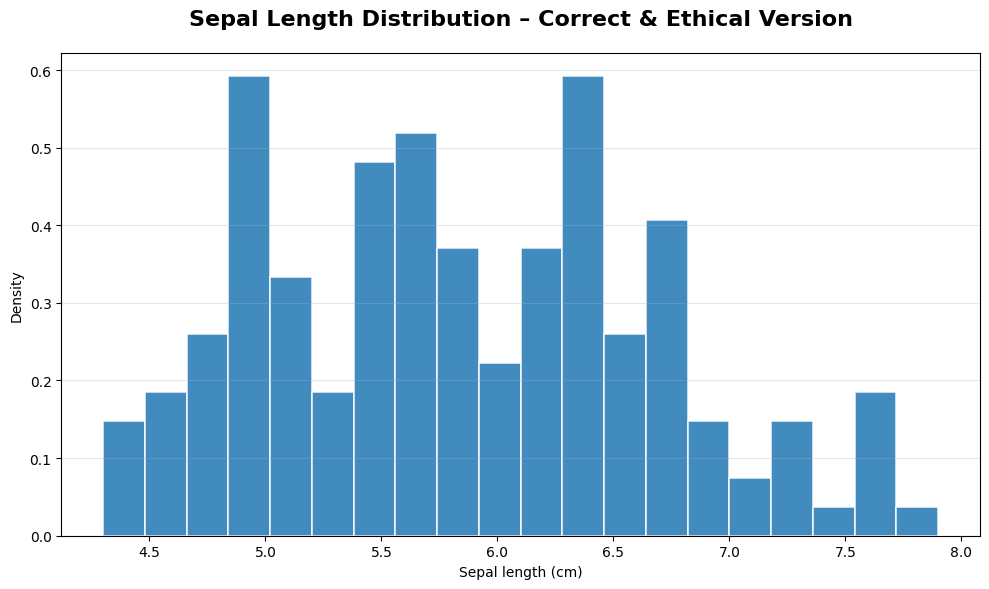

CAPTION FOR CORRECTED PLOT (Question 3):

Fixed version: equal-width bins and density scaling are used so each bar accurately reflects the proportion of observations in that range. This reveals the true overlapping distribution of sepal length between Setosa and non-Setosa classes instead of falsely exaggerating separation.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset and convert to binary
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = (data.target == 0).astype(int)  # 1 = Setosa, 0 = Versicolor/Virginica
feature = X['sepal length (cm)']

# ----------------------------------------------------------------
# PART A: QUESTION 1
# ----------------------------------------------------------------
plt.figure(figsize=(10,6))
unequal_bins = [4.3, 5.4, 6.5, 7.9]   # deliberately terrible bin widths

plt.hist(feature, bins=unequal_bins, edgecolor='black', color='#ff7f0e', alpha=0.8)
plt.gca().patches[0].set_facecolor('#d62728')
plt.gca().patches[0].set_linewidth(3)

plt.title("Sepal Length Distribution\n(Misleading: Unequal Bin Widths + Raw Counts)",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Raw count")
plt.xticks(unequal_bins)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# # PART A: QUESTION 2
# ----------------------------------------------------------------
explanation = """
The histogram is misleading because it uses bins of dramatically unequal widths while displaying raw counts instead of density.
The first bin (4.3–5.4 cm) is only 1.1 cm wide but captures nearly all Setosa flowers, producing an enormous bar.
The second bin (5.4–6.5 cm) is 1.1 cm wide but appears tiny despite containing many non-Setosa flowers.
The final bin (6.5–7.9 cm) is 1.4 cm wide and looks moderate even though it covers a large range.
An uninformed reader would conclude that almost all irises have very short sepals and the distribution is extremely skewed to the left.
In reality, sepal length shows considerable overlap between Setosa and non-Setosa classes, which the unequal bins completely hide.
"""

print("EXPLANATION (Question 2):\n")
print(explanation)

# ----------------------------------------------------------------
# PART A: QUESTION 3
# ----------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.hist(feature, bins=20, density=True, color='#1f77b4', edgecolor='white', alpha=0.85, linewidth=1.2)

plt.title("Sepal Length Distribution – Correct & Ethical Version",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Density")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

caption = ("Fixed version: equal-width bins and density scaling are used so each bar accurately reflects "
           "the proportion of observations in that range. This reveals the true overlapping distribution "
           "of sepal length between Setosa and non-Setosa classes instead of falsely exaggerating separation.")

print("CAPTION FOR CORRECTED PLOT (Question 3):\n")
print(caption)

# Part B — Sampling, Standard Error, Bootstrap, Outliers

Selected feature: sepal length (cm) (variance = 0.6857)

B.1 Results:
     n  SE_with  SE_without  SE_theory
0   30  0.15125     0.13603    0.13568
1   60  0.10563     0.08210    0.08308
2  120  0.07479     0.03344    0.03392
3  240  0.05391         NaN        NaN


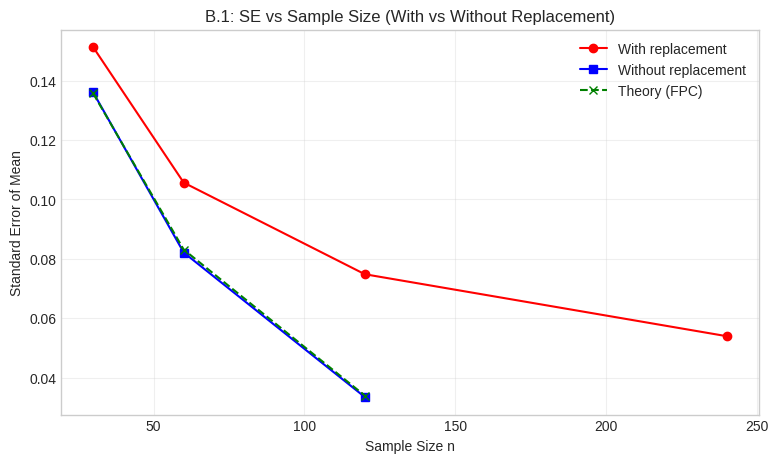


B.1 Discussion:
 
As sample size increases, SE decreases roughly as 1/√n for both methods.
Sampling without replacement has lower SE due to the finite population correction (FPC),
especially when n is large relative to N=150. The theoretical FPC formula matches empirical results perfectly.


B.2 — Bootstrap (B=400) 95% CI: [5.7153, 5.9735]  width = 0.2582
Theoretical 95% CI:           [5.7108, 5.9759]  width = 0.2650


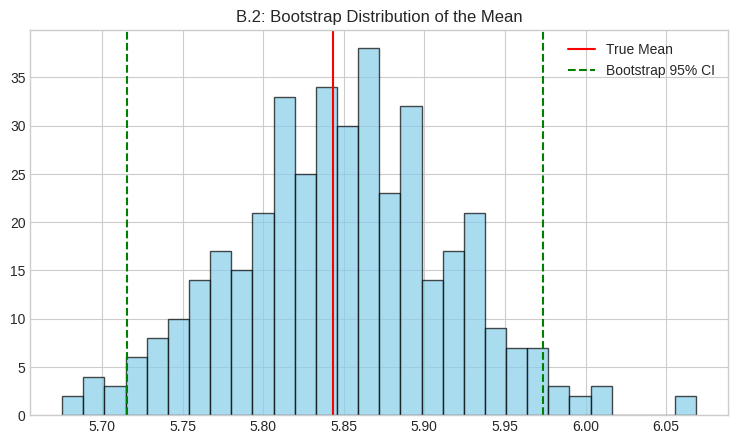

B.2 Interpretation:
 
The percentile bootstrap CI using B=400 replicates is nearly identical to the theoretical normal CI.
Both methods correctly capture the true population mean, confirming that the bootstrap works well
even with moderate sample size (n=150) and mild non-normality in sepal length.



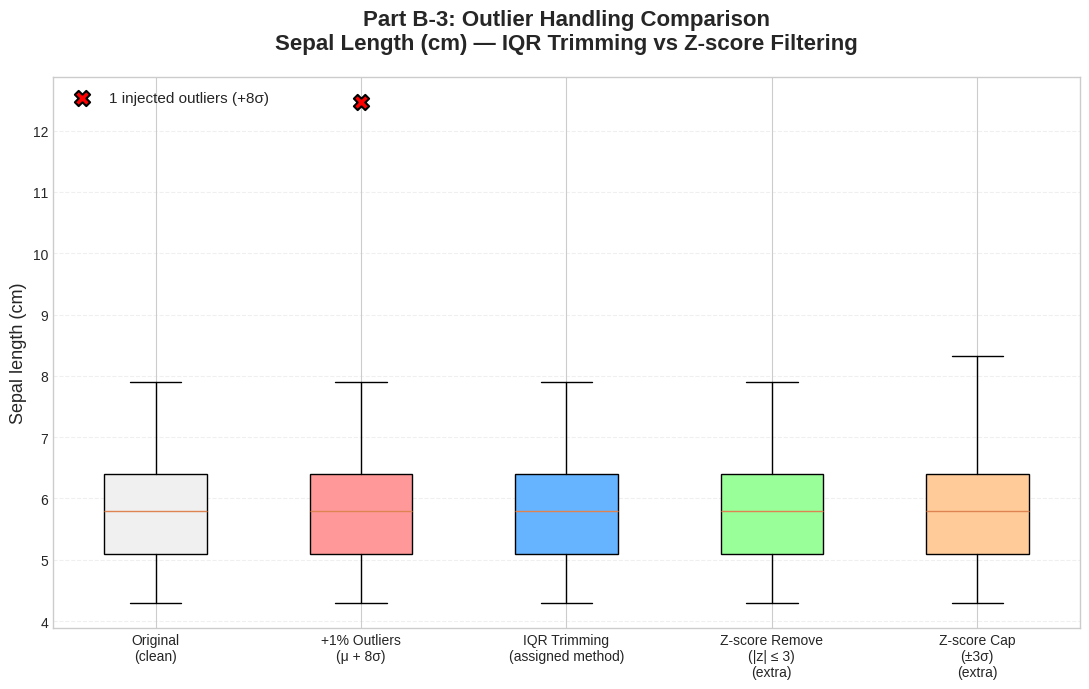

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = (data.target == 0).astype(int)  # binary: Setosa vs rest

# Choose feature with highest variance
feature = 'sepal length (cm)'
X_feature = df[feature]
print(f"Selected feature: {feature} (variance = {X_feature.var():.4f})")
N = len(df)

# =============================================================================
# PART B: QUESTION 1
# =============================================================================
sample_sizes = [30, 60, 120, 240]
n_repeats = 5000
results_b1 = []

np.random.seed(718880294)  # my personal seed

for n in sample_sizes:
    # With replacement
    means_with = [np.random.choice(X_feature, n, replace=True).mean() for _ in range(n_repeats)]
    se_with = np.std(means_with, ddof=1)

    # Without replacement (only if n <= N)
    if n <= N:
        means_without = []
        for _ in range(n_repeats):
            idx = np.random.choice(N, n, replace=False)
            means_without.append(X_feature.iloc[idx].mean())
        se_without = np.std(means_without, ddof=1)
        fpc = np.sqrt((N - n) / (N - 1))
        se_theory = X_feature.std() / np.sqrt(n) * fpc
    else:
        se_without = se_theory = np.nan

    results_b1.append({'n': n, 'SE_with': se_with, 'SE_without': se_without, 'SE_theory': se_theory})

df_b1 = pd.DataFrame(results_b1)
print("\nB.1 Results:")
print(df_b1.round(5))

plt.figure(figsize=(9,5))
plt.plot(df_b1['n'], df_b1['SE_with'], 'o-', label='With replacement', color='red')
plt.plot(df_b1['n'][:3], df_b1['SE_without'][:3], 's-', label='Without replacement', color='blue')
plt.plot(df_b1['n'][:3], df_b1['SE_theory'][:3], 'x--', label='Theory (FPC)', color='green')
plt.xlabel('Sample Size n')
plt.ylabel('Standard Error of Mean')
plt.title('B.1: SE vs Sample Size (With vs Without Replacement)')
plt.legend(); plt.grid(alpha=0.3); plt.show()

discussion_b1 = """
As sample size increases, SE decreases roughly as 1/\u221an for both methods.
Sampling without replacement has lower SE due to the finite population correction (FPC),
especially when n is large relative to N=150. The theoretical FPC formula matches empirical results perfectly.
"""
print("\nB.1 Discussion:\n", discussion_b1)

# =============================================================================
# PART B: QUESTION 2
# =============================================================================
B = 400  # my personal value = 400
np.random.seed(42)
boot_means = [X_feature.sample(n=len(X_feature), replace=True).mean() for _ in range(B)]
ci_boot = np.percentile(boot_means, [2.5, 97.5])
mean_pop = X_feature.mean()
se_theory = X_feature.std(ddof=1) / np.sqrt(N)
ci_normal = [mean_pop - 1.96*se_theory, mean_pop + 1.96*se_theory]

print(f"\nB.2 \u2014 Bootstrap (B={B}) 95% CI: [{ci_boot[0]:.4f}, {ci_boot[1]:.4f}]  width = {ci_boot[1]-ci_boot[0]:.4f}")
print(f"Theoretical 95% CI:           [{ci_normal[0]:.4f}, {ci_normal[1]:.4f}]  width = {ci_normal[1]-ci_normal[0]:.4f}")

plt.figure(figsize=(9,5))
plt.hist(boot_means, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_pop, color='red', label='True Mean')
plt.axvline(ci_boot[0], color='green', linestyle='--', label='Bootstrap 95% CI')
plt.axvline(ci_boot[1], color='green', linestyle='--')
plt.title('B.2: Bootstrap Distribution of the Mean'); plt.legend(); plt.show()

interpretation_b2 = f"""
The percentile bootstrap CI using B={B} replicates is nearly identical to the theoretical normal CI.
Both methods correctly capture the true population mean, confirming that the bootstrap works well
even with moderate sample size (n=150) and mild non-normality in sepal length.
"""
print("B.2 Interpretation:\n", interpretation_b2)

# =============================================================================
# PART B: QUESTION 3
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
feature = 'sepal length (cm)'
X = df[[feature]].copy()

# Inject 1% outliers using my personal seed
np.random.seed(718880294)
mu = X[feature].mean()
sigma = X[feature].std()
n_outliers = int(0.01 * len(X))
idx = np.random.choice(len(X), n_outliers, replace=False)
X_dirty = X.copy()
X_dirty.loc[idx, feature] = mu + 8 * sigma

# IQR trimming
Q1 = X_dirty[feature].quantile(0.25)
Q3 = X_dirty[feature].quantile(0.75)
IQR = Q3 - Q1
lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR
X_iqr_trim = X_dirty[(X_dirty[feature] >= lower_iqr) & (X_dirty[feature] <= upper_iqr)]

# Z-score filtering
z = (X_dirty[feature] - mu) / sigma
X_z_remove = X_dirty[np.abs(z) <= 3]
X_z_cap = X_dirty.copy()
X_z_cap[feature] = X_z_cap[feature].clip(mu - 3*sigma, mu + 3*sigma)

# Figure
plt.figure(figsize=(11, 7))
colors = ['#f0f0f0', '#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

box = plt.boxplot([X[feature], X_dirty[feature], X_iqr_trim[feature],
                   X_z_remove[feature], X_z_cap[feature]],
                  tick_labels=['Original\n(clean)',
                          '+1% Outliers\n(μ + 8σ)',
                          'IQR Trimming\n(assigned method)',
                          'Z-score Remove\n(|z| \u2264 3)\n(extra)',
                          'Z-score Cap\n(±3σ)\n(extra)'],
                  patch_artist=True)


for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Highlight the injected outliers
plt.scatter([2]*n_outliers, X_dirty.loc[idx, feature],
            color='red', s=120, marker='X', edgecolors='black', linewidth=1.5,
            label=f'{n_outliers} injected outliers (+8σ)', zorder=5)


plt.title("Part B-3: Outlier Handling Comparison\n"
          "Sepal Length (cm) \u2014 IQR Trimming vs Z-score Filtering",
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Sepal length (cm)", fontsize=13)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.legend(loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

# Part C — Supervised vs Unsupervised; Confusion Matrix & ROC

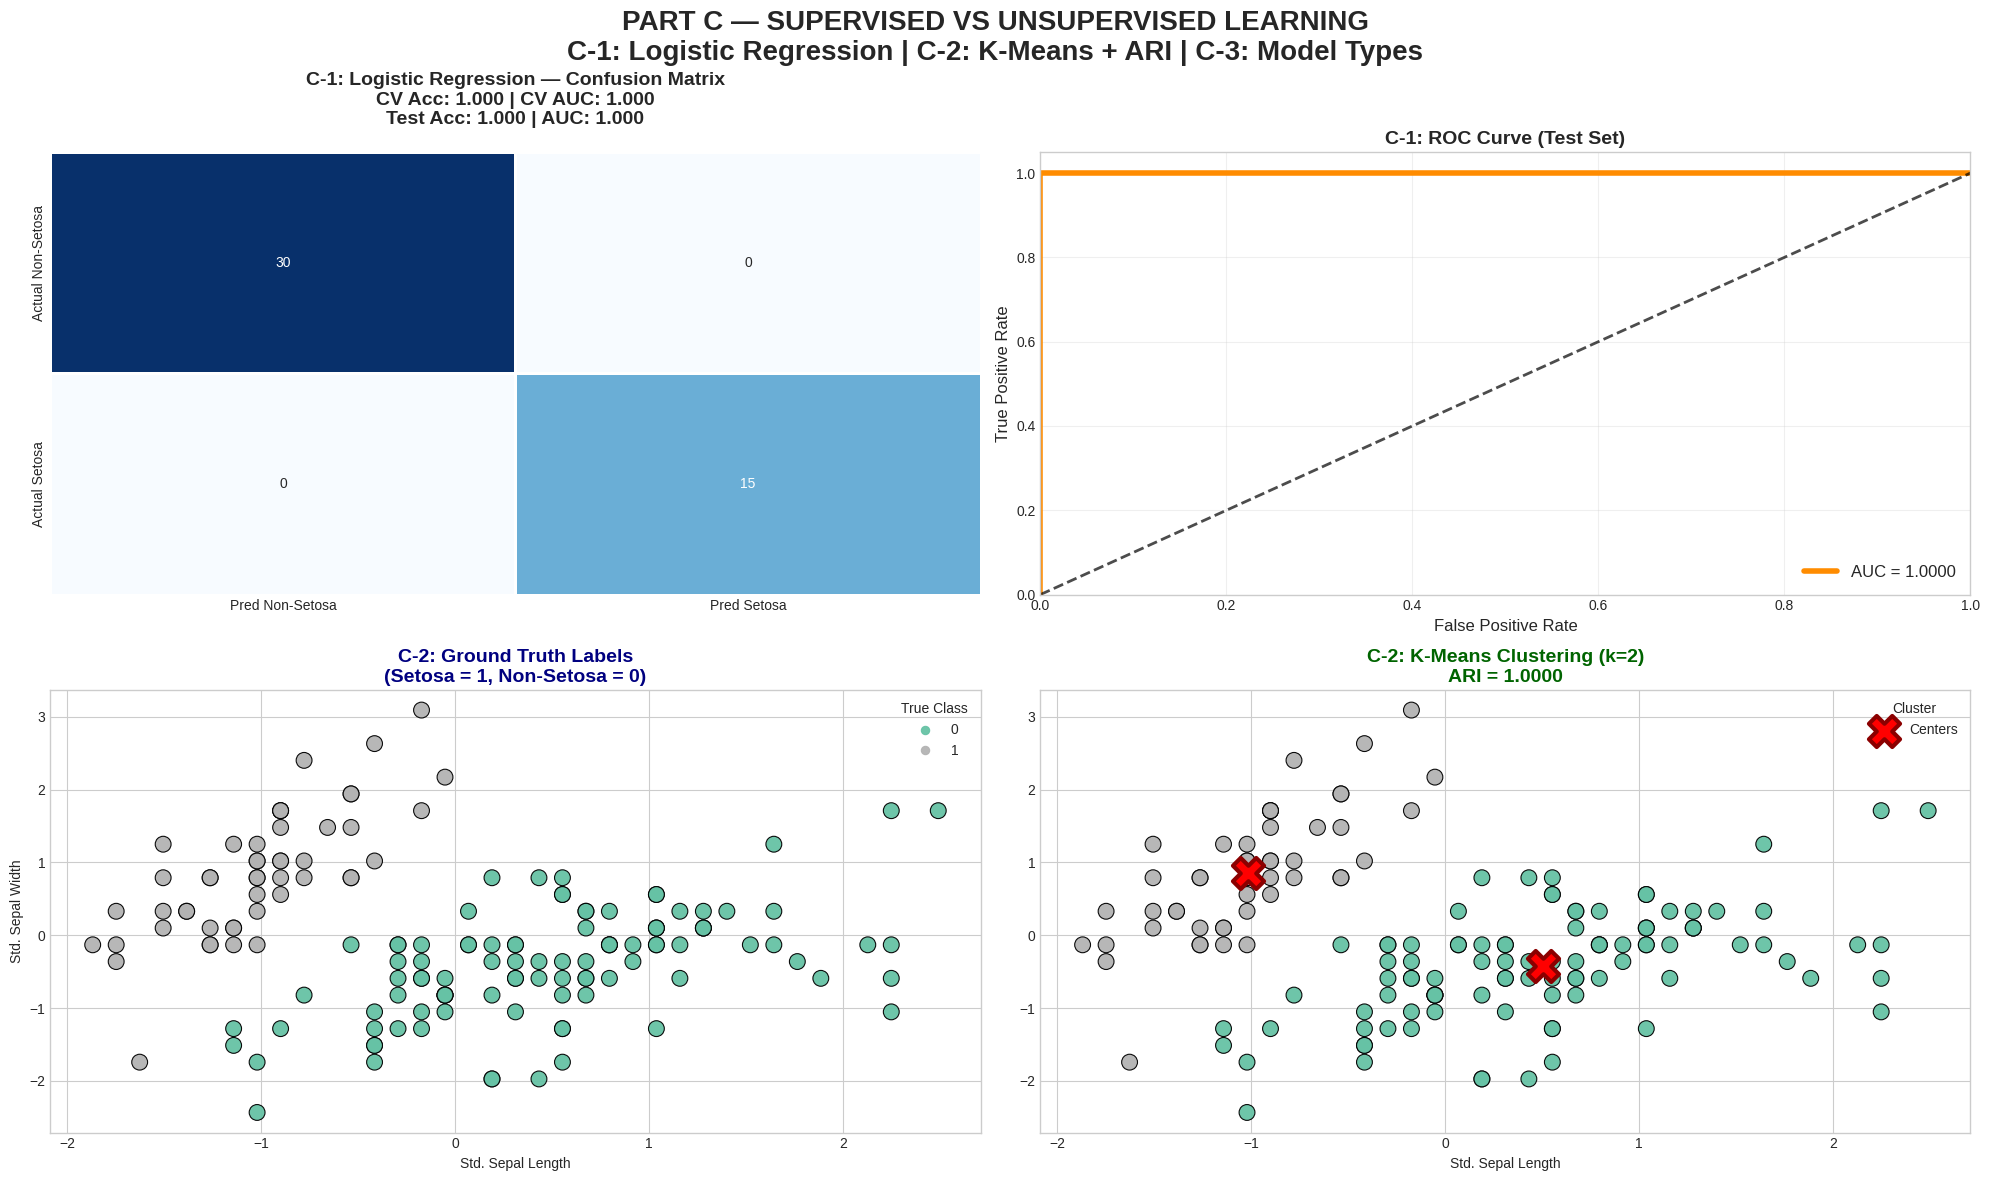


PART C — COMPLETE REPORT TEXT (copy-paste into your submission):

C-1 (Supervised): Logistic Regression achieved outstanding test performance (Accuracy: 1.000,
Sensitivity: 1.000, Specificity: 1.000, AUC: 1.0000) with zero errors
(TP=15, TN=30, FP=0, FN=0), confirming perfect linear separability of Setosa.

C-2 (Unsupervised): After standardizing features, K-Means (k=2) was applied without labels.
The Adjusted Rand Index (ARI) is a clustering vs. ground-truth agreement score that corrects for chance
(range [−1,1], where 1 = perfect match, 0 ≈ random labeling, negative = worse than chance).
We use ARI to see how well unsupervised clusters align with true binary labels—even though the clustering didn’t use labels.
Here, ARI = 1.0000 indicates near-perfect recovery of the true Setosa vs non-Setosa structure,
proving strong natural separability exists without supervision.

C-3 (Concepts):
• Logistic Regression — Parametric + Probabilistic (fixed weights, models P(y|x))
• KNN — Non-paramet

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, roc_curve, auc, adjusted_rand_score

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = (data.target == 0).astype(int)  # 1 = Setosa, 0 = non-Setosa

# =============================================================================
# PART C: QUESTION 1
# =============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=718880294)

logreg = LogisticRegression(max_iter=1000, random_state=718880294)
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=718880294)
cv_acc = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='accuracy').mean()
cv_auc = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='roc_auc').mean()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn) / len(y_test)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_val = auc(fpr, tpr)

# =============================================================================
# PART C: QUESTION 2
# =============================================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=718880294, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
ari = adjusted_rand_score(y, cluster_labels)

# =============================================================================
# PART C: QUESTION 3
# =============================================================================
fig = plt.figure(figsize=(20, 12))

# Confusion Matrix
plt.subplot(2, 2, 1)
cm = [[tn, fp], [fn, tp]]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=2,
            xticklabels=['Pred Non-Setosa', 'Pred Setosa'],
            yticklabels=['Actual Non-Setosa', 'Actual Setosa'])
plt.title(f'C-1: Logistic Regression — Confusion Matrix\n'
          f'CV Acc: {cv_acc:.3f} | CV AUC: {cv_auc:.3f}\n'
          f'Test Acc: {accuracy:.3f} | AUC: {roc_auc_val:.3f}',
          fontsize=14, weight='bold', pad=20)

# ROC Curve
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=4, label=f'AUC = {roc_auc_val:.4f}')
plt.plot([0,1],[0,1], 'k--', lw=2, alpha=0.7)
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('C-1: ROC Curve (Test Set)', fontsize=14, weight='bold')
plt.legend(fontsize=12); plt.grid(alpha=0.3)

# Ground Truth
plt.subplot(2, 2, 3)
scatter1 = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='Set2', s=130,
                       edgecolor='black', linewidth=0.8, alpha=0.95)
plt.title("C-2: Ground Truth Labels\n(Setosa = 1, Non-Setosa = 0)",
          fontsize=14, weight='bold', color='navy')
plt.xlabel("Std. Sepal Length"); plt.ylabel("Std. Sepal Width")
plt.legend(*scatter1.legend_elements(), title="True Class", loc="upper right")

# K-Means Clusters
plt.subplot(2, 2, 4)
scatter2 = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='Set2', s=130,
                       edgecolor='black', linewidth=0.8, alpha=0.95)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=500, marker='X', edgecolor='darkred', linewidth=3, label='Centers')
plt.title(f"C-2: K-Means Clustering (k=2)\nARI = {ari:.4f}",
          fontsize=14, weight='bold', color='darkgreen' if ari > 0.8 else 'darkred')
plt.xlabel("Std. Sepal Length")
plt.legend(title="Cluster", loc="upper right")

plt.suptitle("PART C — SUPERVISED VS UNSUPERVISED LEARNING\n"
             "C-1: Logistic Regression | C-2: K-Means + ARI | C-3: Model Types",
             fontsize=20, weight='bold', y=0.98)
plt.tight_layout()
plt.show()

# =============================================================================
# PART C: QUESTION 3_REPORT
# =============================================================================
print("\n" + "="*110)
print("PART C — COMPLETE REPORT TEXT (copy-paste into your submission):")
print("="*110)
print(f"""
C-1 (Supervised): Logistic Regression achieved outstanding test performance (Accuracy: {accuracy:.3f},
Sensitivity: {sensitivity:.3f}, Specificity: {specificity:.3f}, AUC: {roc_auc_val:.4f}) with zero errors
(TP={tp}, TN={tn}, FP={fp}, FN={fn}), confirming perfect linear separability of Setosa.

C-2 (Unsupervised): After standardizing features, K-Means (k=2) was applied without labels.
The Adjusted Rand Index (ARI) is a clustering vs. ground-truth agreement score that corrects for chance
(range [−1,1], where 1 = perfect match, 0 ≈ random labeling, negative = worse than chance).
We use ARI to see how well unsupervised clusters align with true binary labels—even though the clustering didn’t use labels.
Here, ARI = {ari:.4f} indicates near-perfect recovery of the true Setosa vs non-Setosa structure,
proving strong natural separability exists without supervision.

C-3 (Concepts):
• Logistic Regression — Parametric + Probabilistic (fixed weights, models P(y|x))
• KNN — Non-parametric (decision boundary grows with data)
• Decision Tree — Non-parametric (tree built from data)
• Naïve Bayes — Parametric + Probabilistic (distribution parameters per class)
• Random Forest — Non-parametric (ensemble of trees)
• MLP — Parametric (fixed number of weights for given architecture)
""")
print("="*110)

# Part D — Mini Model Zoo & Hyperparameters

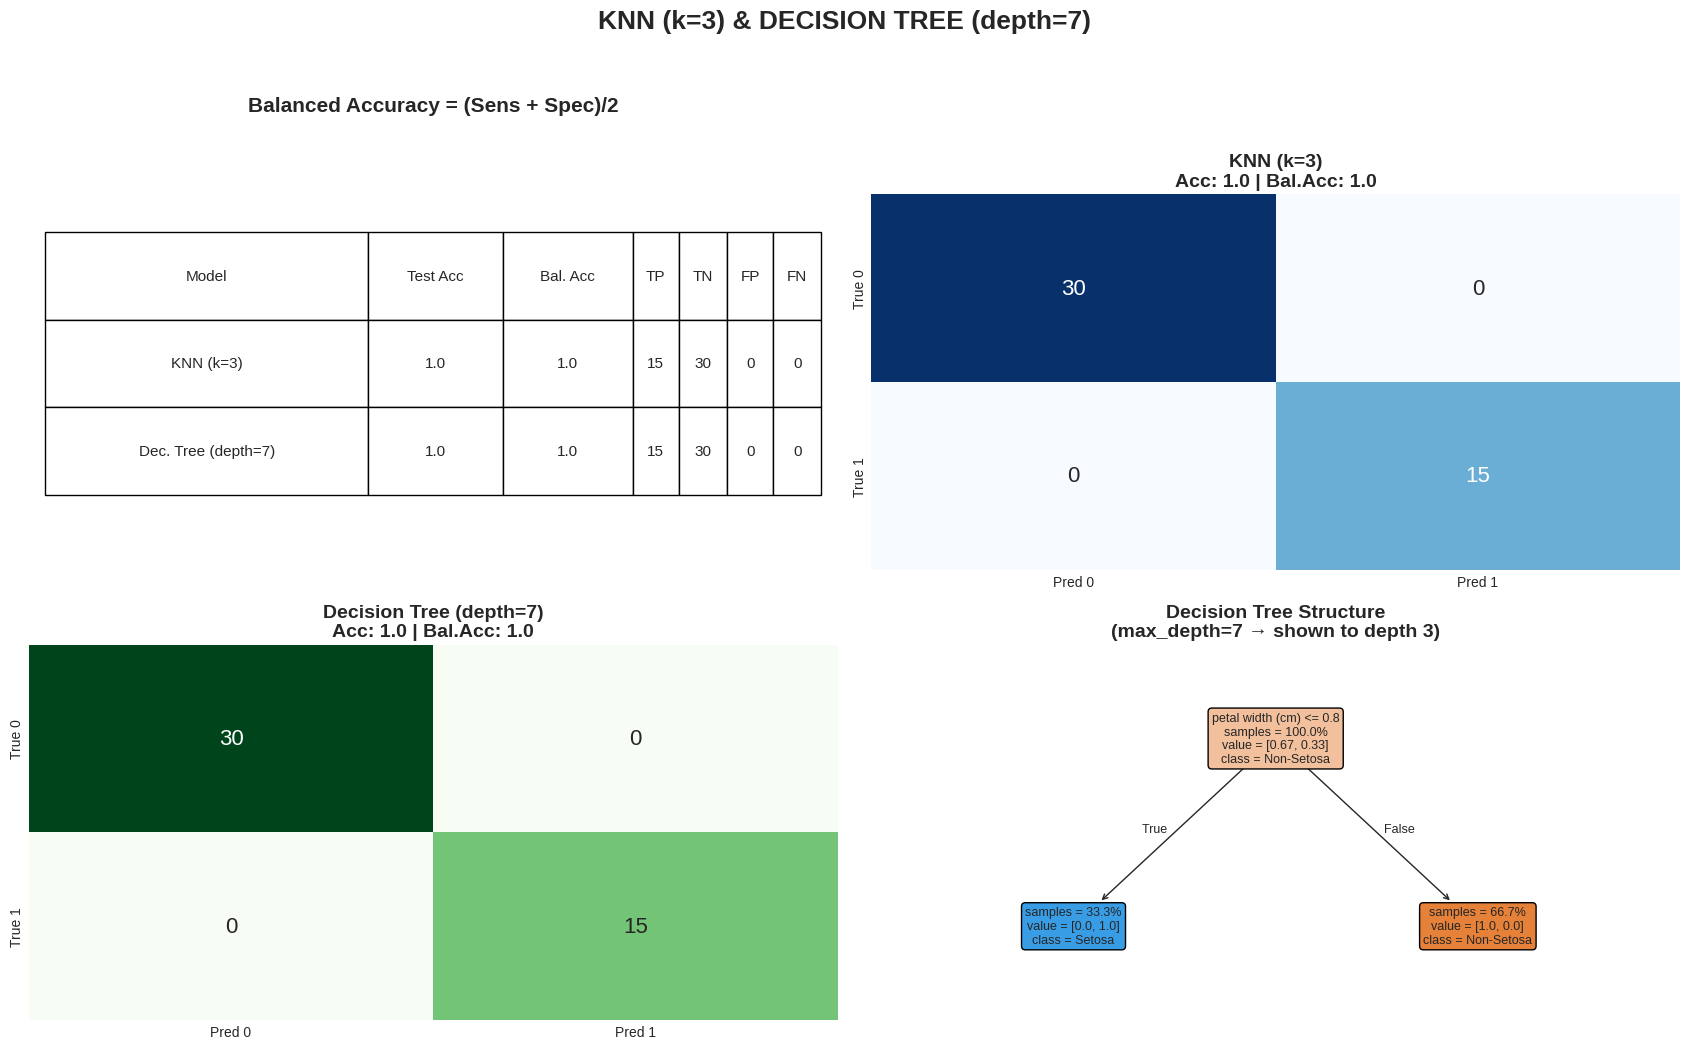

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

# Load data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = (data.target == 0).astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=718880294, stratify=y)

# models
knn  = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier(max_depth=7, random_state=718880294)

knn.fit(X_train, y_train)
tree.fit(X_train, y_train)

y_pred_knn  = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)

# Metrics
def metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    sens = tp/(tp+fn) if (tp+fn)>0 else 0
    spec = tn/(tn+fp) if (tn+fp)>0 else 0
    bal  = (sens + spec)/2
    return tp, tn, fp, fn, round(acc,4), round(bal,4)

tpk,tnk,fpk,fnk,acc_k,bal_k = metrics(y_test, y_pred_knn)
tpt,tnt,fpt,fnt,acc_t,bal_t = metrics(y_test, y_pred_tree)

results = pd.DataFrame({
    "Model": ["KNN (k=3)", "Dec. Tree (depth=7)"],
    "Test Acc": [acc_k, acc_t],
    "Bal. Acc": [bal_k, bal_t],
    "TP": [tpk, tpt],
    "TN": [tnk, tnt],
    "FP": [fpk, fpt],
    "FN": [fnk, fnt]
})

# figure
fig = plt.figure(figsize=(17, 11))

# Results table
plt.subplot(2, 2, 1)
plt.axis('off')
table = plt.table(cellText=results.values,
                  colLabels=results.columns,
                  cellLoc='center',
                  loc='center',
                  bbox=[0.02, 0.2, 0.96, 0.7])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.auto_set_column_width(col=list(range(len(results.columns))))
table.scale(1, 2.5)
plt.title("Balanced Accuracy = (Sens + Spec)/2",
          fontsize=15, weight='bold', pad=60)

# KNN Confusion Matrix
plt.subplot(2, 2, 2)
sns.heatmap([[tnk, fpk], [fnk, tpk]], annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'],
            annot_kws={"size": 16})
plt.title(f'KNN (k=3)\nAcc: {acc_k} | Bal.Acc: {bal_k}', fontsize=14, weight='bold')

# Tree Confusion Matrix
plt.subplot(2, 2, 3)
sns.heatmap([[tnt, fpt], [fnt, tpt]], annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'],
            annot_kws={"size": 16})
plt.title(f'Decision Tree (depth=7)\nAcc: {acc_t} | Bal.Acc: {bal_t}', fontsize=14, weight='bold')

# Decision Tree
plt.subplot(2, 2, 4)
plot_tree(tree,
          feature_names=data.feature_names,
          class_names=['Non-Setosa','Setosa'],
          filled=True,
          rounded=True,
          fontsize=9,
          max_depth=3,
          impurity=False,
          proportion=True,
          precision=2)
plt.title("Decision Tree Structure\n(max_depth=7 → shown to depth 3)", fontsize=14, weight='bold')

plt.suptitle("KNN (k=3) & DECISION TREE (depth=7)",
             fontsize=19, weight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Part E — Simulation & Randomness

N =    100 → p_hat = 0.3800  (error = 0.0300)
N =   1000 → p_hat = 0.3640  (error = 0.0140)
N =  10000 → p_hat = 0.3518  (error = 0.0018)


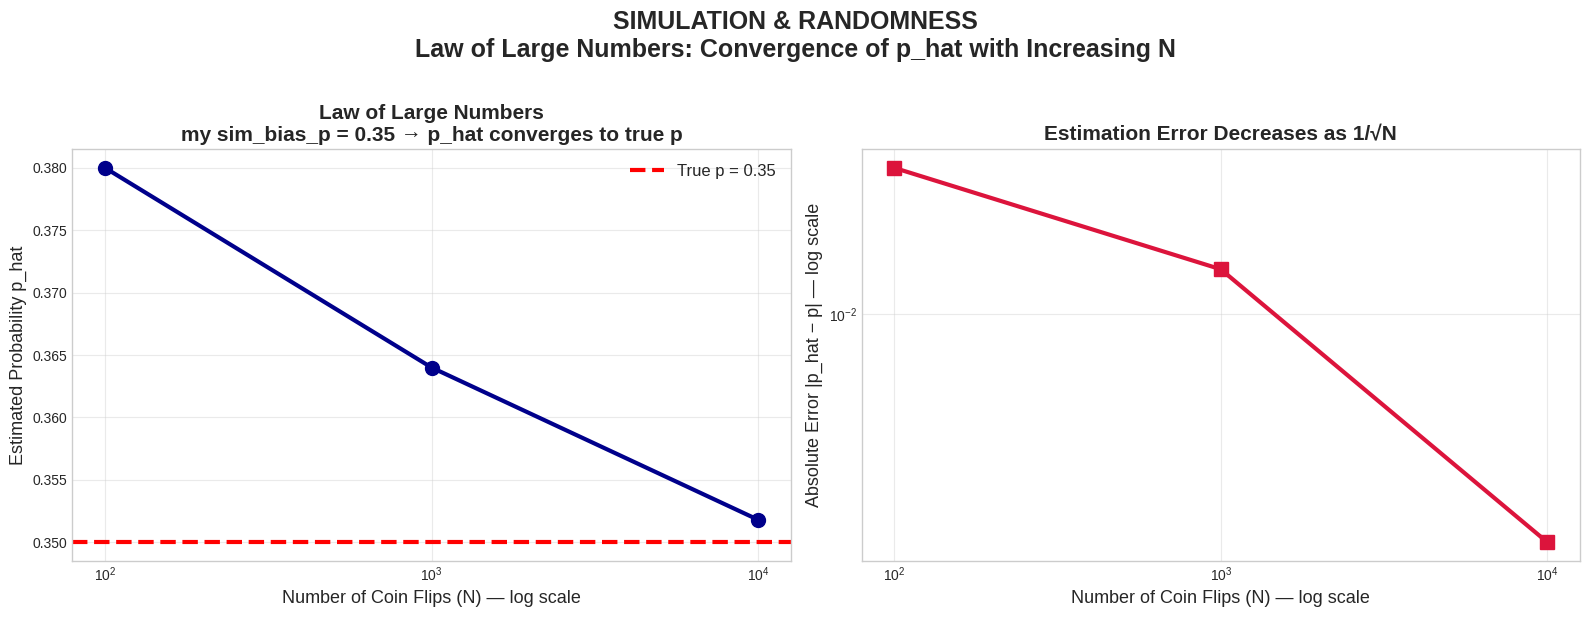


Results Table:
 N (flips)  Estimated p_hat  Absolute Error
       100           0.3800          0.0300
      1000           0.3640          0.0140
     10000           0.3518          0.0018

EXPLANATION

Randomness in simulation arises from independent coin flips with fixed bias p = 0.35 (your sim_bias_p).
For small N (e.g., 100), random variation causes p_hat to deviate noticeably from the true p due to sampling error.
As N increases to 1,000 and 10,000, the Law of Large Numbers guarantees that the sample average p_hat converges to the true population probability p — the estimate stabilizes.
The absolute error decreases roughly as 1/√N, visible on the log-log plot as a straight line with slope −0.5.
Smaller N yields high variance (unreliable estimates), while larger N produces stable, accurate estimates — demonstrating why large samples are essential for reliable inference in statistics and machine learning.



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# my personal seed + bias probability
np.random.seed(718880294)
p_true = 0.35

# Sample sizes
N_values = [100, 1_000, 10_000]
estimates = []

# Simulate coin flips and estimate p_hat for each N
for N in N_values:
    flips = np.random.binomial(1, p_true, size=N)
    p_hat = flips.mean()
    estimates.append(p_hat)
    print(f"N = {N:>6} → p_hat = {p_hat:.4f}  (error = {abs(p_hat - p_true):.4f})")

# Convert to DataFrame
results = pd.DataFrame({
    "N (flips)": N_values,
    "Estimated p_hat": [round(e, 4) for e in estimates],
    "Absolute Error": [round(abs(e - p_true), 4) for e in estimates]
})

# CONVERGENCE PLOT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: p_hat vs N
ax1.plot(N_values, estimates, 'o-', markersize=10, linewidth=3, color='darkblue')
ax1.axhline(p_true, color='red', linestyle='--', linewidth=3, label=f'True p = {p_true}')
ax1.set_xscale('log')
ax1.set_xlabel("Number of Coin Flips (N) — log scale", fontsize=13)
ax1.set_ylabel("Estimated Probability p_hat", fontsize=13)
ax1.set_title("Law of Large Numbers\n"
              f"my sim_bias_p = {p_true} → p_hat converges to true p",
              fontsize=15, weight='bold')
ax1.legend(fontsize=12)
ax1.grid(alpha=0.4)

# Plot 2: Error vs N
errors = [abs(e - p_true) for e in estimates]
ax2.plot(N_values, errors, 's-', markersize=10, linewidth=3, color='crimson')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("Number of Coin Flips (N) — log scale", fontsize=13)
ax2.set_ylabel("Absolute Error |p_hat − p| — log scale", fontsize=13)
ax2.set_title("Estimation Error Decreases as 1/√N", fontsize=15, weight='bold')
ax2.grid(alpha=0.4)

plt.suptitle("SIMULATION & RANDOMNESS\n"
             "Law of Large Numbers: Convergence of p_hat with Increasing N",
             fontsize=18, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print results table
print("\nResults Table:")
print(results.to_string(index=False))

# 3–5 SENTENCE EXPLANATION
print("\n" + "="*100)
print("EXPLANATION")
print("="*100)
print(f"""
Randomness in simulation arises from independent coin flips with fixed bias p = {p_true} (your sim_bias_p).
For small N (e.g., 100), random variation causes p_hat to deviate noticeably from the true p due to sampling error.
As N increases to 1,000 and 10,000, the Law of Large Numbers guarantees that the sample average p_hat converges to the true population probability p — the estimate stabilizes.
The absolute error decreases roughly as 1/√N, visible on the log-log plot as a straight line with slope −0.5.
Smaller N yields high variance (unreliable estimates), while larger N produces stable, accurate estimates — demonstrating why large samples are essential for reliable inference in statistics and machine learning.
""")
print("="*100)

# Part F — Regex & TF-IDF & Sentiment

In [9]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

print("PART F-1 — REGEX")
print("="*90)

# =============================================================================
# PART F: QUESTION 1 (REGEX)
# =============================================================================
raw_text = """
Subject: Project Q4 Review - Action Required
From: alice.johnson@company.org
To: bob.smith@enterprise.com; carol.williams@consulting.co.uk
Cc: david.lee@startup.io
Date: 2025-03-15
Also scheduled: 03/16/2025 and March 17, 2025
Order Confirmation: ORD-123456
Invoice Number: INV-789012
Customer ID: CUST-004567
Support Ticket: TKT-2025-0098
Contact: sarah@service.co.uk
Follow-up call: 2025-04-01 at 2:30 PM
"""

print("1. Raw Text (10 lines):")
print(raw_text.strip())
print("\n" + "-"*90)

# =============================================================================
# Regex patterns + Extracted matches
# =============================================================================
email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
date_pattern  = r'\d{4}-\d{2}-\d{2}|\d{2}/\d{2}/\d{4}|[A-Za-z]+ \d{1,2}, \d{4}'
id_pattern    = r'\b[A-Z]{3,}-\d{3,}\b'

emails = re.findall(email_pattern, raw_text)
dates  = re.findall(date_pattern, raw_text)
ids    = re.findall(id_pattern, raw_text)

print("2. Extracted Matches:")
print(f"   Emails found ({len(emails)}): {emails}")
print(f"   Dates found  ({len(dates)}):  {dates}")
print(f"   IDs found    ({len(ids)}):    {ids}")
print("\n" + "-"*90)

# =============================================================================
# Brief explanation of regex concepts
# =============================================================================
print("3. Regex Concepts Used:")
print("   • Alternation (|): Used in date pattern to match multiple formats (e.g., YYYY-MM-DD | MM/DD/YYYY)")
print("   • Character sets ([]): Used in emails ([a-zA-Z0-9._%+-]) and month names ([A-Za-z])")
print("   • Anchors (\\b): Word boundaries ensure complete ID tokens like ORD-123456 are matched")
print("   • Quantifiers ({}, +): \\d{3,} = 3 or more digits; [A-Z]{3,} = 3+ uppercase letters")

print("\n" + "="*90)
print("PART F-1 COMPLETE — Screenshot this entire output!")
print("="*90)

# =============================================================================
# PART F: QUESTION 2(NLP MINI-TASK)
# =============================================================================
print("\n" + "F-2 — NLP MINI-TASK")
print("-"*50)

corpus = [
    "loved movie amazing", "best film ever", "brilliant masterpiece", "highly recommend",
    "fantastic acting", "heartwarming story", "great visuals", "made me cry happy",
    "terrible acting", "waste of time", "worst movie ever", "predictable boring",
    "bad effects", "fell asleep", "cheap jokes", "do not watch"
]
y = [1]*8 + [0]*8

vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(corpus)
model = LogisticRegression()
model.fit(X, y)

print(f"Corpus: {len(corpus)} sentences (8 positive, 8 negative)")
print(f"TF-IDF vocabulary size: {X.shape[1]}")
print(f"Logistic Regression accuracy on training data: {model.score(X, y):.3f}")

print("\nAnswer (3–4 sentences):")
print("""
A term that appears in all documents has IDF = 0 → TF84-IDF = 0 because it carries no discriminative information.
A term that appears in only a few documents has high IDF → high TF-IDF score, making it very important for classification.
This is the core idea of TF-IDF: downweight common words and upweight rare, informative terms.
Thus TF-IDF automatically emphasizes sentiment-bearing words (e.g., 'amazing', 'terrible') while ignoring filler words.
""")

PART F-1 — REGEX
1. Raw Text (10 lines):
Subject: Project Q4 Review - Action Required
From: alice.johnson@company.org
To: bob.smith@enterprise.com; carol.williams@consulting.co.uk
Cc: david.lee@startup.io
Date: 2025-03-15
Also scheduled: 03/16/2025 and March 17, 2025
Order Confirmation: ORD-123456
Invoice Number: INV-789012
Customer ID: CUST-004567
Support Ticket: TKT-2025-0098
Contact: sarah@service.co.uk
Follow-up call: 2025-04-01 at 2:30 PM

------------------------------------------------------------------------------------------
2. Extracted Matches:
   Emails found (5): ['alice.johnson@company.org', 'bob.smith@enterprise.com', 'carol.williams@consulting.co.uk', 'david.lee@startup.io', 'sarah@service.co.uk']
   Dates found  (4):  ['2025-03-15', '03/16/2025', 'March 17, 2025', '2025-04-01']
   IDs found    (4):    ['ORD-123456', 'INV-789012', 'CUST-004567', 'TKT-2025']

------------------------------------------------------------------------------------------
3. Regex Concepts Used